Applying Neural Networks to Classify Iris Flower Species: A Multilayer Perceptron Approach

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from sklearn.metrics import classification_report, confusion_matrix

2023-04-20 00:12:25.620253: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the dataset
df = pd.read_csv('dataset/iris.data')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 0.98, 'Relation between Sepal Width and Sepal Length')

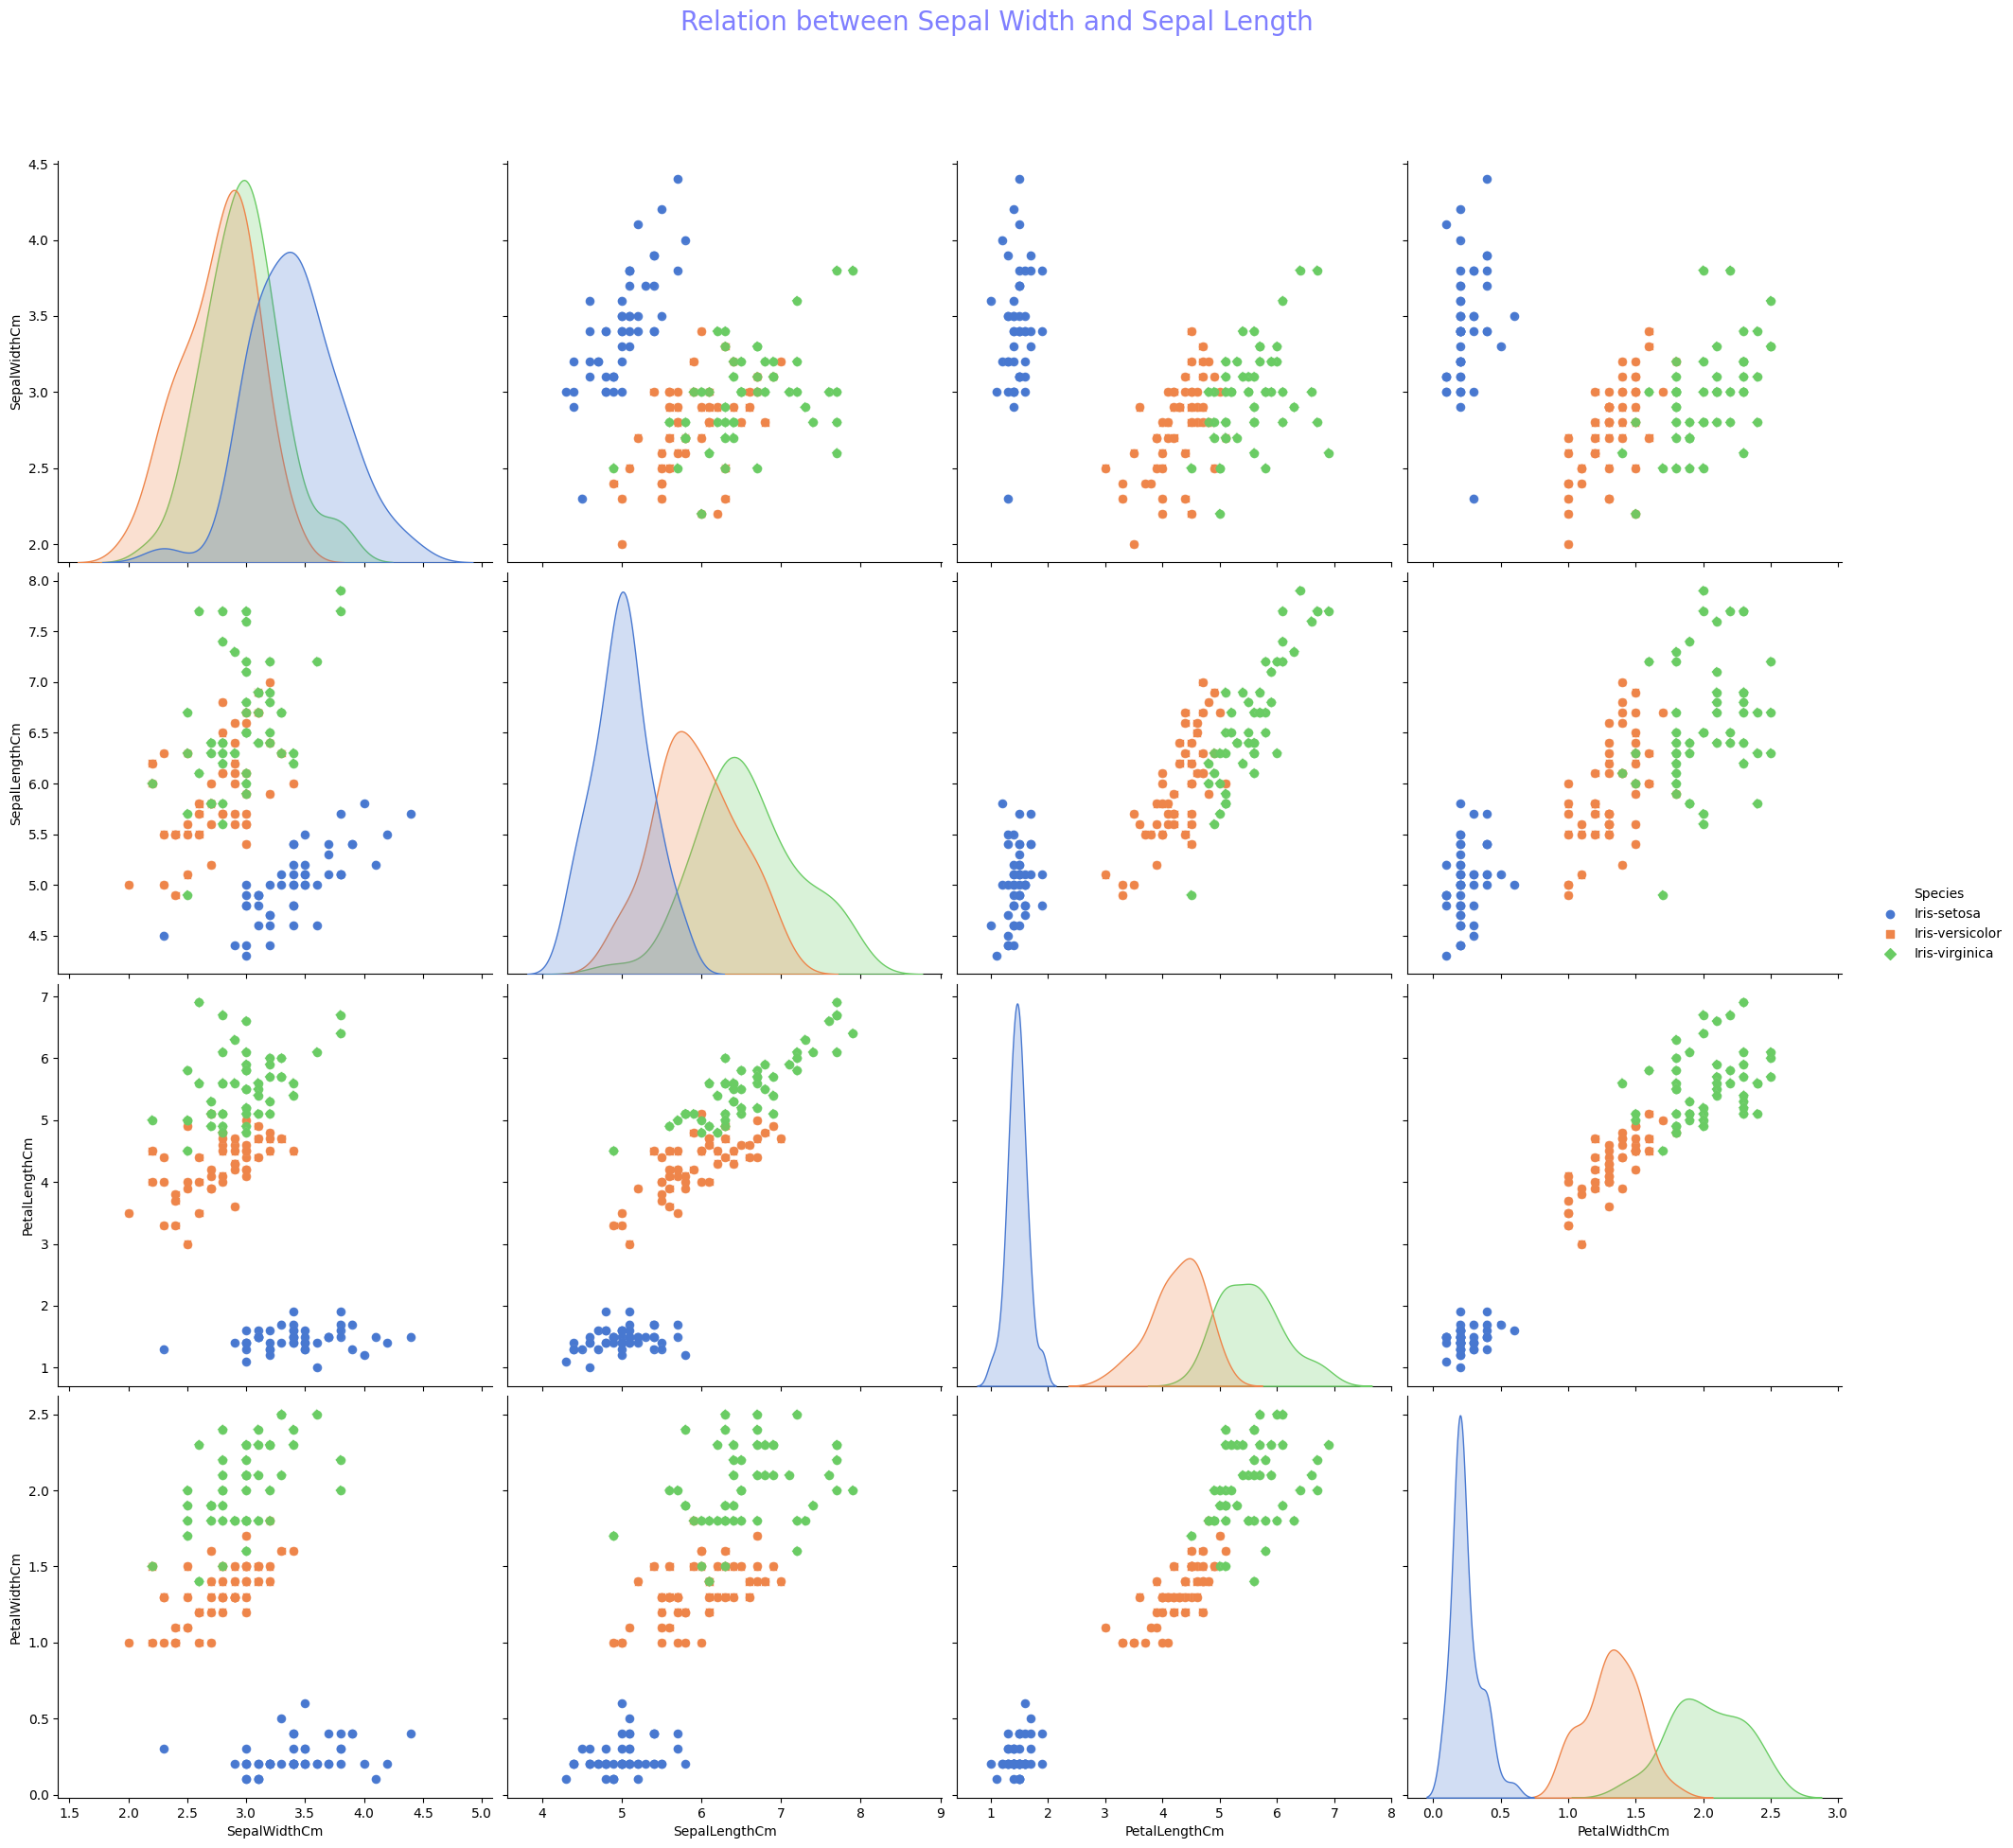

In [4]:
# Plotting iris dataset with matplotlib
a = sns.pairplot(df,
                 hue = 'Species',
                 palette = 'muted',
                 height = 5,\
                 vars = ['SepalWidthCm', 'SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm'],\
                 kind = 'scatter',
                 markers=["o", "s", "D"])

# Add a legend
a = a.map_offdiag(plt.scatter, s = 35, alpha = 0.9)

# Remove the top and right spines from plot(s).
sns.despine()

# Additional line to adjust some appearance issues
plt.subplots_adjust(top = 0.9)

# Add a title
a.fig.suptitle('Relation between Sepal Width and Sepal Length', fontsize = 20, color = 'b', alpha = 0.5)

In [5]:
X_data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_data = df['Species']
unscaled_df = X_data

Scale the data <br>
`Calculate μ & σ(fit) and apply the transformation(transform)
Center test data with the μ & σ computed (fitted) on training data`

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaled_data = scaler.fit_transform(X_data.values)
scaled_df = pd.DataFrame(scaled_data, index = X_data.index, columns = X_data.columns)

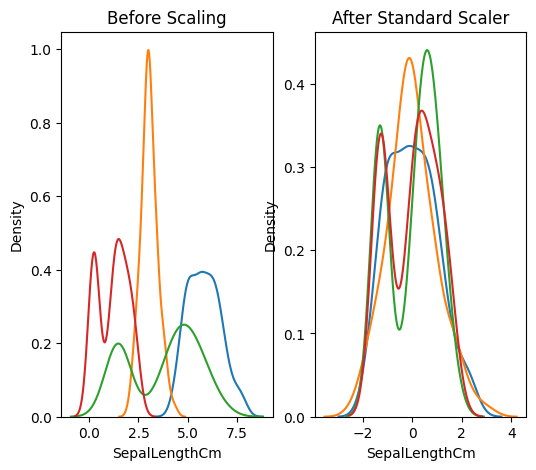

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(unscaled_df['SepalLengthCm'], ax=ax1)
sns.kdeplot(unscaled_df['SepalWidthCm'], ax=ax1)
sns.kdeplot(unscaled_df['PetalLengthCm'], ax=ax1)
sns.kdeplot(unscaled_df['PetalWidthCm'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['SepalLengthCm'], ax=ax2)
sns.kdeplot(scaled_df['SepalWidthCm'], ax=ax2)
sns.kdeplot(scaled_df['PetalLengthCm'], ax=ax2)
sns.kdeplot(scaled_df['PetalWidthCm'], ax=ax2)

plt.show()

In [9]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df.values, y_data, test_size = 0.2, random_state=42)

In [10]:
# Convert labels to one-hot encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [11]:
# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes = 3)
y_test = keras.utils.to_categorical(y_test, num_classes = 3)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


In [13]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=4))
model.add(Dense(3, activation='softmax'))
sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/Users/josetorronteras/Code/MLP-Keras-Iris-Dataset/env/lib/python3.9/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
history = model.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
4/4 [==============================] - 1s 4ms/step - loss: 1.1278 - accuracy: 0.2667
Epoch 2/20
4/4 [==============================] - 0s 3ms/step - loss: 0.9633 - accuracy: 0.4167
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 0.7833 - accuracy: 0.7417
Epoch 4/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6431 - accuracy: 0.8250
Epoch 5/20
4/4 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.8417
Epoch 6/20
4/4 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.8583
Epoch 7/20
4/4 [==============================] - 0s 5ms/step - loss: 0.4296 - accuracy: 0.8750
Epoch 8/20
4/4 [==============================] - 0s 6ms/step - loss: 0.3948 - accuracy: 0.8833
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3666 - accuracy: 0.9083
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3451 - accuracy: 0.9250
Epoch 11/20
4/4 [======================

In [15]:
score = model.evaluate(X_test, y_test, verbose = 0)

In [16]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.17427203059196472
Test accuracy: 0.9666666388511658


In [17]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 215ms/step


In [18]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [19]:
results_df = pd.DataFrame.from_dict(history.history)

<Axes: >

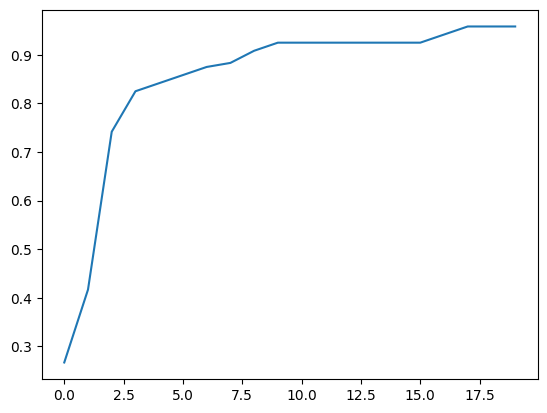

In [20]:
results_df['accuracy'].plot()

<Axes: >

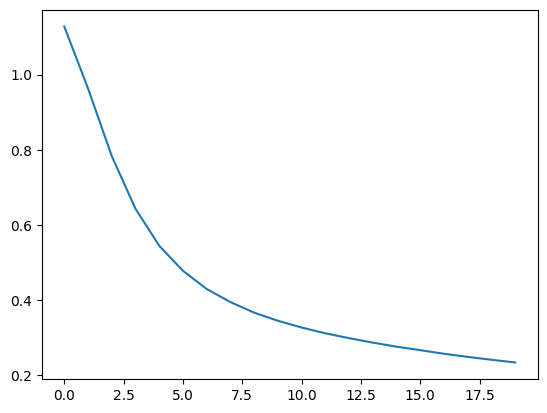

In [21]:
results_df['loss'].plot()